In [15]:
import gym
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import time

### 5-1 初始化环境并玩1步(此代码不友好，不建议运行)

In [2]:
'''
env=gym.make('Taxi-v3')
observation=env.reset()
taxirow,taxicol,passloc,destidx=env.unwrapped.decode(observation)
print(taxirow,taxicol,passloc,destidx)
print('出租车位置={}'.format((taxirow,taxicol)))
print('乘客位置={}'.format(env.unwrapped.locs[passloc]))
print('目标位置={}'.format(env.unwrapped.locs[destidx]))
env.render()
env.step(1)
env.close()
'''

"\nenv=gym.make('Taxi-v3')\nobservation=env.reset()\ntaxirow,taxicol,passloc,destidx=env.unwrapped.decode(observation)\nprint(taxirow,taxicol,passloc,destidx)\nprint('出租车位置={}'.format((taxirow,taxicol)))\nprint('乘客位置={}'.format(env.unwrapped.locs[passloc]))\nprint('目标位置={}'.format(env.unwrapped.locs[destidx]))\nenv.render()\nenv.step(1)\nenv.close()\n"

### 5-2 SARSA算法智能体的实现

In [99]:
class SARSAAgent:#算法5-6
    def __init__(self,env,gamma=0.9,learning_rate=0.1,epsilon=0.01):
        self.gamma=gamma
        self.epsilon=epsilon
        self.learning_rate=learning_rate
        self.action_n=env.action_space.n
        self.q=np.zeros(shape=(env.observation_space.n,env.action_space.n))

    def decides(self,state):
        if np.random.uniform() < self.epsilon:
            action=np.random.randint(self.action_n)
        else:
            action=self.q[state].argmax()
        return action

    def learn(self,state,action,next_state,next_action,reward,done):
        u=reward+self.gamma*self.q[next_state,next_action]*(1.-done)
        error=u-self.q[state,action]
        self.q[state,action] += self.learning_rate*error

    

### 5-3 SARSA智能体与环境交互1回合

In [100]:
def play_sarsa(env,agent,train=False,render=False):
    episode_reward=0
    observation=env.reset()
    action=agent.decides(observation)
    while 1:
        if render:
            env.render()
        next_observation,reward,done,info=env.step(action)
        episode_reward += reward
        next_action=agent.decides(next_observation)
        if train:
            agent.learn(observation,action,next_observation,next_action,reward,done)
        if done:
            break
        observation,action=next_observation,next_action
    return episode_reward   

### 5-4 训练SARSA算法

当前步数：4995------当步奖励：10
当前步数：4996------当步奖励：10
当前步数：4997------当步奖励：6
当前步数：4998------当步奖励：9
当前步数：4999------当步奖励：10


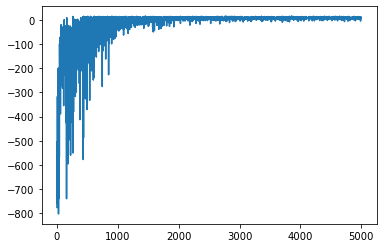

In [101]:
env=gym.make('Taxi-v3')
agent=SARSAAgent(env)
turns=5000
episode_rewards=[]
for turn in range(turns):
    if turn<turns-5:
        episode_reward=play_sarsa(env,agent,train=True,render=False)
    else:
        episode_reward=play_sarsa(env,agent,train=True,render=True)
        print('当前步数：{}------当步奖励：{}'.format(turn,episode_reward))
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)
env.close()

### 5-5 测试SARSA算法

In [78]:
agent.epsilon=0.
episode_rewards=[play_sarsa(env,agent) for i in range(100)]
print('平均回合奖励={}/{}={}'.format(sum(episode_rewards),len(episode_rewards),np.mean(episode_rewards)))

平均回合奖励=810/100=8.1


### 5-6 期望SARSA算法智能体类

In [41]:
class ExpectSARSAAgent:
    def __init__(self,env,gamma=0.9,learning_rate=0.1,epsilon=0.01):
        self.gamma=gamma
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.action_n=env.action_space.n
        self.q=np.zeros(shape=(env.observation_space.n,env.action_space.n))

    def decides(self,state):
        if np.random.uniform() < self.epsilon:
            action=np.random.randint(self.action_n)
        else:
            action=self.q[state].argmax()
        return action

    def learn(self,observation,action,reward,done,next_observation):
        v=self.q[next_observation].mean()*self.epsilon+self.q[next_observation].max()*(1.-self.epsilon)
        u=reward+self.gamma*v*(1.-done)
        td_error=u-self.q[observation,action]
        self.q[observation,action] += self.learning_rate*td_error

### 5-7 Q学习智能体与环境的交互

In [47]:
def playQlearning(env,agent,learn=False,render=False):
    total_rewards=0
    observation=env.reset()
    while 1:
        if render:
            env.render()
        action=agent.decides(observation)
        next_observation,reward,done,info=env.step(action)
        total_rewards += reward
        if learn:
            agent.learn(observation,action,reward,done,next_observation)
        if done:
            break
        observation=next_observation
    return total_rewards

### 5-8 训练期望SARSA算法

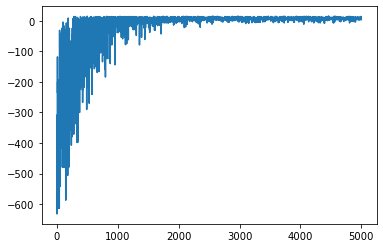

In [62]:
env=gym.make('Taxi-v3')
agent=ExpectSARSAAgent(env)
turns=5000
episode_rewards=[]
for turn in range(turns):
    
    if turn<turns-5:
        episode_reward=playQlearning(env,agent,learn=True)
    else:
        episode_reward=playQlearning(env,agent,learn=True,render=True)
    '''
    episode_reward=playQlearning(env,agent,learn=True)
    '''
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)
env.close()

### 5-9 测试期望SARSA算法

In [63]:
agent.epsilon=0
episode_rewards=[playQlearning(env,agent) for _ in range(100)]
print('平均回合奖励={}/{}={}'.format(sum(episode_rewards),len(episode_rewards),np.mean(episode_rewards)))

平均回合奖励=800/100=8.0


### 5-9 Q学习智能体类

In [68]:
class QlearningAgent:
    def __init__(self,env,gamma=0.9,epsilon=0.01,learning_rate=0.1):
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.gamma=gamma
        self.action_n=env.action_space.n
        self.q=np.zeros(shape=(env.observation_space.n,env.action_space.n))

    def decides(self,state):
        if np.random.uniform()<self.epsilon:
            action=np.random.randint(self.action_n)
        else:
            action=self.q[state].argmax()
        return action
    def learn(self,state,action,reward,done,next_state):
        u=reward+self.gamma*self.q[next_state].max()*(1.-done)
        td_error=u-self.q[state,action]
        self.q[state,action] += self.learning_rate*td_error

/home/zlz/anaconda3/envs/RL_gym/lib/python3.9/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


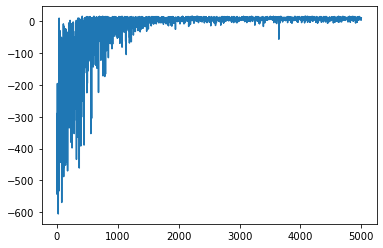

In [69]:
#训练Q学习
env=gym.make('Taxi-v3')
agent=QlearningAgent(env)
turns=5000
episode_rewards=[]
for turn in range(turns):
    
    if turn<turns-5:
        episode_reward=playQlearning(env,agent,learn=True)
    else:
        episode_reward=playQlearning(env,agent,learn=True,render=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)
env.close()
    

In [71]:
# 测试Q学习
agent.epsilon=0
episode_rewards=[playQlearning(env,agent) for _ in range(100)]
print('平均回合奖励={}/{}={}'.format(sum(episode_rewards),len(episode_rewards),np.mean(episode_rewards)))

平均回合奖励=848/100=8.48


### 5-11 双重Q学习智能体类

In [82]:
class DoubleQlearningAgent:
    def __init__(self,env,gamma=0.9,learning_rate=0.1,epsilon=0.01):
        self.gamma=gamma
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.action_n=env.action_space.n
        self.q0=np.zeros(shape=(env.observation_space.n,env.action_space.n))
        self.q1=np.zeros(shape=(env.observation_space.n,env.action_space.n))
    def decides(self,state):
        if np.random.uniform()<self.epsilon:
            action=np.random.randint(self.action_n)
        else:
            action=(self.q0+self.q1)[state].argmax()
        return action
    
    def learn(self,state,action,reward,done,next_state):
        if np.random.randint(2):
            self.q0,self.q1=self.q1,self.q0
        a=self.q0[next_state].argmax()
        u=reward+self.gamma*self.q1[next_state,a]*(1.-done)
        td_error=u-self.q0[state,action]
        self.q0[state,action] += self.learning_rate*td_error


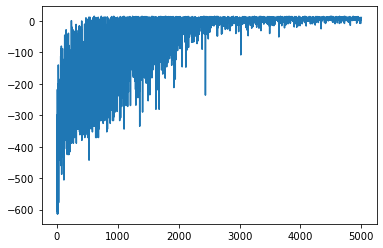

In [85]:
# 训练双重Q学习
env=gym.make('Taxi-v3')
agent=DoubleQlearningAgent(env)
turns=5000
episode_rewards=[]
for turn in range(turns):
    
    if turn<turns-5:
        episode_reward=playQlearning(env,agent,learn=True)
    else:
        episode_reward=playQlearning(env,agent,learn=True,render=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)
env.close()
    

In [84]:
# 测试双重Q学习
agent.epsilon=0
episode_rewards=[playQlearning(env,agent) for _ in range(100)]
print('平均回合奖励={}/{}={}'.format(sum(episode_rewards),len(episode_rewards),np.mean(episode_rewards)))

平均回合奖励=-1924/100=-19.24


### 5-12 SARSA($\lambda$)算法智能体类

In [96]:
class SARSALambdaAgent():
    def __init__(self,env,lambd=0.5,beta=1.,learning_rate=0.1,gamma=0.9,epsilon=0.01):
        self.gamma=gamma
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.lambd=lambd
        self.beta=beta
        self.e=np.zeros(shape=(env.observation_space.n,env.action_space.n))
        self.q=np.zeros(shape=(env.observation_space.n,env.action_space.n))
        self.action_n=env.action_space.n
    def decides(self,state):
        if np.random.uniform() < self.epsilon:
            action=np.random.randint(self.action_n)
        else:
            action=self.q[state].argmax()
        return action
    def learn(self,state,action,next_state,next_action,reward,done):
        #更新资格迹
        self.e *= self.lambd*self.gamma
        self.e[state,action]=1.+self.beta*self.e[state,action]
        #更新价值
        u=reward+self.gamma*self.q[next_state,next_action]*(1.-done)
        td_error=u-self.q[state,action]
        self.q += self.learning_rate*self.e*td_error
        # 为下一回和初始化资格迹
        if done:
            self.e *= 0.

/home/zlz/anaconda3/envs/RL_gym/lib/python3.9/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/zlz/anaconda3/envs/RL_gym/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/zlz/anaconda3/envs/RL_gym/lib/python3.9/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment i

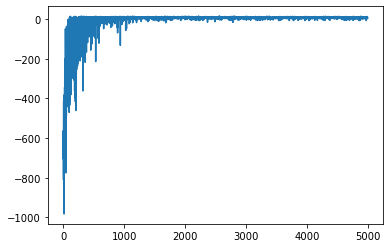

In [97]:
# 训练SARSALambda
env=gym.make('Taxi-v3')
agent=SARSALambdaAgent(env)
turns=5000
episode_rewards=[]
for turn in range(turns):
    if turn<turns-5:
        episode_reward=play_sarsa(env,agent,train=True)
    else:
        episode_reward=play_sarsa(env,agent,train=True,render=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)
env.close()

In [98]:
# 测试SARSALambda
agent.epsilon=0
episode_rewards=[playQlearning(env,agent) for _ in range(100)]
print('平均回合奖励={}/{}={}'.format(sum(episode_rewards),len(episode_rewards),np.mean(episode_rewards)))

平均回合奖励=748/100=7.48
